In [40]:
import matplotlib.pyplot as plt
import json
from run import run as run_lca
from run_baseline import run as run_baseline
from tools import *
from init_logger import init_logger


In [46]:
lca_log_path = '/ekaterina/work/src/lca/lca/tmp/logs/beluga_encounters_20240926_205850.log'
baseline_log_path_1 = '/ekaterina/work/src/lca/lca/tmp/logs/beluga_baseline_topk.log'
baseline_log_path_2 = '/ekaterina/work/src/lca/lca/tmp/logs/beluga_baseline_topk.log'
species = 'beluga'

def read_log(path):
    with open(path) as f:
        log = f.read()
    return log

lca_log = read_log(lca_log_path)
baseline_log = read_log(baseline_log_path)



In [47]:
import re


# def extract_stats(log, stats='Basic stats'):
#     m = re.findall(rf'{stats}: (?s:.+?)(?=per)', log)
#     def process_match(match):
#         return dict(re.findall(r'"(.+?)": (.+?),', match))
#     return [process_match(match) for match in m]

def extract_stats(log, stats='Incremental stats'):
    # Adjusting regex to capture multi-line JSON-like stats
    pattern = rf'{stats}:\s+{{(.+?)}}'
    matches = re.findall(pattern, log, re.DOTALL)
    
    def process_match(match):
        # Converting the match into a dictionary by parsing the contents
        return dict(re.findall(r'"(.+?)":\s+([^,}]+)', match))
    
    return [process_match(match) for match in matches]


lca_log_basic = extract_stats(lca_log, 'Basic stats')
baseline_log_basic = extract_stats(baseline_log, 'Incremental stats')
# zebra_exp_log_reachable = extract_stats(zebra_exp_log, 'Reachable stats')

# zebra_gamma_log_basic = extract_stats(zebra_gamma_log, 'Basic stats')
# zebra_gamma_log_reachable = extract_stats(zebra_gamma_log, 'Reachable stats')

# elephants_exp_log_basic = extract_stats(elephants_exp_log, 'Basic stats')
# elephants_exp_log_reachable = extract_stats(elephants_exp_log, 'Reachable stats')

# elephants_gamma_log_basic = extract_stats(elephants_gamma_log, 'Basic stats')
# elephants_gamma_log_reachable = extract_stats(elephants_gamma_log, 'Reachable stats')


In [49]:
print(baseline_log_basic)

[{'num human': '177', 'num clusters': '674', 'num true clusters': '228', 'frac correct': '0.037091988130563795', 'precision': '1.0', 'recall': '0.1339506172839506', 'error_rate': '0.9629080118694362\n'}, {'num human': '212', 'num clusters': '639', 'num true clusters': '228', 'frac correct': '0.04381846635367762', 'precision': '1.0', 'recall': '0.20864197530864198', 'error_rate': '0.9561815336463224\n'}, {'num human': '222', 'num clusters': '629', 'num true clusters': '228', 'frac correct': '0.046104928457869634', 'precision': '1.0', 'recall': '0.24753086419753087', 'error_rate': '0.9538950715421304\n'}, {'num human': '226', 'num clusters': '625', 'num true clusters': '228', 'frac correct': '0.048', 'precision': '1.0', 'recall': '0.26851851851851855', 'error_rate': '0.952\n'}, {'num human': '228', 'num clusters': '623', 'num true clusters': '228', 'frac correct': '0.048154093097913325', 'precision': '1.0', 'recall': '0.2895061728395062', 'error_rate': '0.9518459069020867\n'}, {'num huma

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


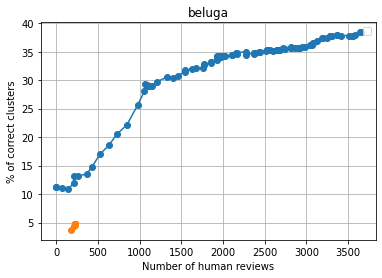

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


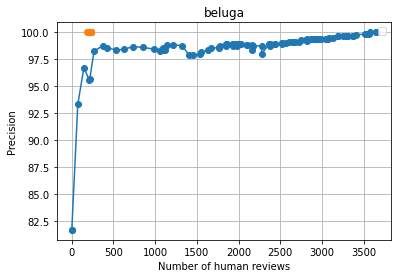

In [48]:
def identity(x):
    return x


def plot(data_lca, data_baseline, x, y, save_path, species, xlabel=None, ylabel=None, xmapping=identity, ymapping=identity, label1="", label2=""):
    if xlabel is None:
        xlabel = x
    if ylabel is None:
        ylabel = y
    
    x_values_lca = [xmapping(entry[x]) for entry in data_lca]
    y_values_lca = [ymapping(entry[y]) for entry in data_lca]

    x_values_baseline = [xmapping(entry[x]) for entry in data_baseline]
    y_values_baseline = [ymapping(entry[y]) for entry in data_baseline]


    sorted_data_lca = sorted(zip(x_values_lca, y_values_lca))
    sorted_data_baseline = sorted(zip(x_values_baseline, y_values_baseline))


    x_values_lca, y_values_lca = zip(*sorted_data_lca)
    x_values_baseline, y_values_baseline = zip(*sorted_data_baseline)


    plt.plot(x_values_lca, y_values_lca, marker='o', label=label1)
    plt.plot(x_values_baseline, y_values_baseline, marker='o', label=label2)


    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(species)
    plt.grid(True)
    plt.legend()


    # plt.savefig(save_path)


    plt.show()

def to_percent(x):
    return 100 * float(x)

plot(lca_log_basic, baseline_log_basic, 
     "num human", "frac correct", None, species,
     xlabel="Number of human reviews", 
     ylabel="% of correct clusters", 
     xmapping=int,
     ymapping=to_percent)
plot(lca_log_basic, baseline_log_basic, 
     "num human", "precision", None, species,
     xlabel="Number of human reviews", 
     ylabel="Precision", 
     xmapping=int,
     ymapping=to_percent)

# plot(lca_log_basic, baseline_log_basic, 
#      "num human", "recall", None, species,
#      xlabel="Number of human reviews", 
#      ylabel="Precision", 
#      xmapping=int,
#      ymapping=to_percent)

# for (stats1, stats2, title) in [(zebra_exp_log_basic, zebra_gamma_log_basic, "Basic stats zebra"),
#         (zebra_exp_log_reachable, zebra_gamma_log_reachable, "Reachable stats zebra"),
#         (elephants_exp_log_basic, elephants_gamma_log_basic, "Basic stats elephants"),
#         (elephants_exp_log_reachable, elephants_gamma_log_reachable, "Reachable stats elephants")]:
#     for (metric, label) in [("recall", "Recall, %"), ("precision", "Precision, %"), ("frac correct", "% correct"), ("error_rate", "Error rate, %")]:
#         plot(stats1, stats2, 
#             "num human", metric, None, title,
#             xlabel="Number of human reviews", 
#             ylabel=label, 
#             xmapping=int,
#             ymapping=to_percent,
#             label1="Exp",
#             label2="Gamma")